In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/sign_mnist_train.csv'

df = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
from sklearn.model_selection import train_test_split
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(21964, 784) (21964,)
(5491, 784) (5491,)


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X_train = X_train.values.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.values.reshape(-1, 28, 28, 1) / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=26)
y_test = keras.utils.to_categorical(y_test, num_classes=26)

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.28),
        layers.Dense(26, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4548 - loss: 1.8566 - val_accuracy: 0.9838 - val_loss: 0.0660
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9588 - loss: 0.1328 - val_accuracy: 0.9987 - val_loss: 0.0160
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9806 - loss: 0.0606 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9900 - loss: 0.0326 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9901 - loss: 0.0316 - val_accuracy: 1.0000 - val_loss: 5.6828e-04
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 1.0000 - val_loss: 1.9062e-04
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9935 - loss: 0.0220 - val_accuracy: 0.9998 - val_loss: 3.4659e-04
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9932 - loss: 0.0192 - va

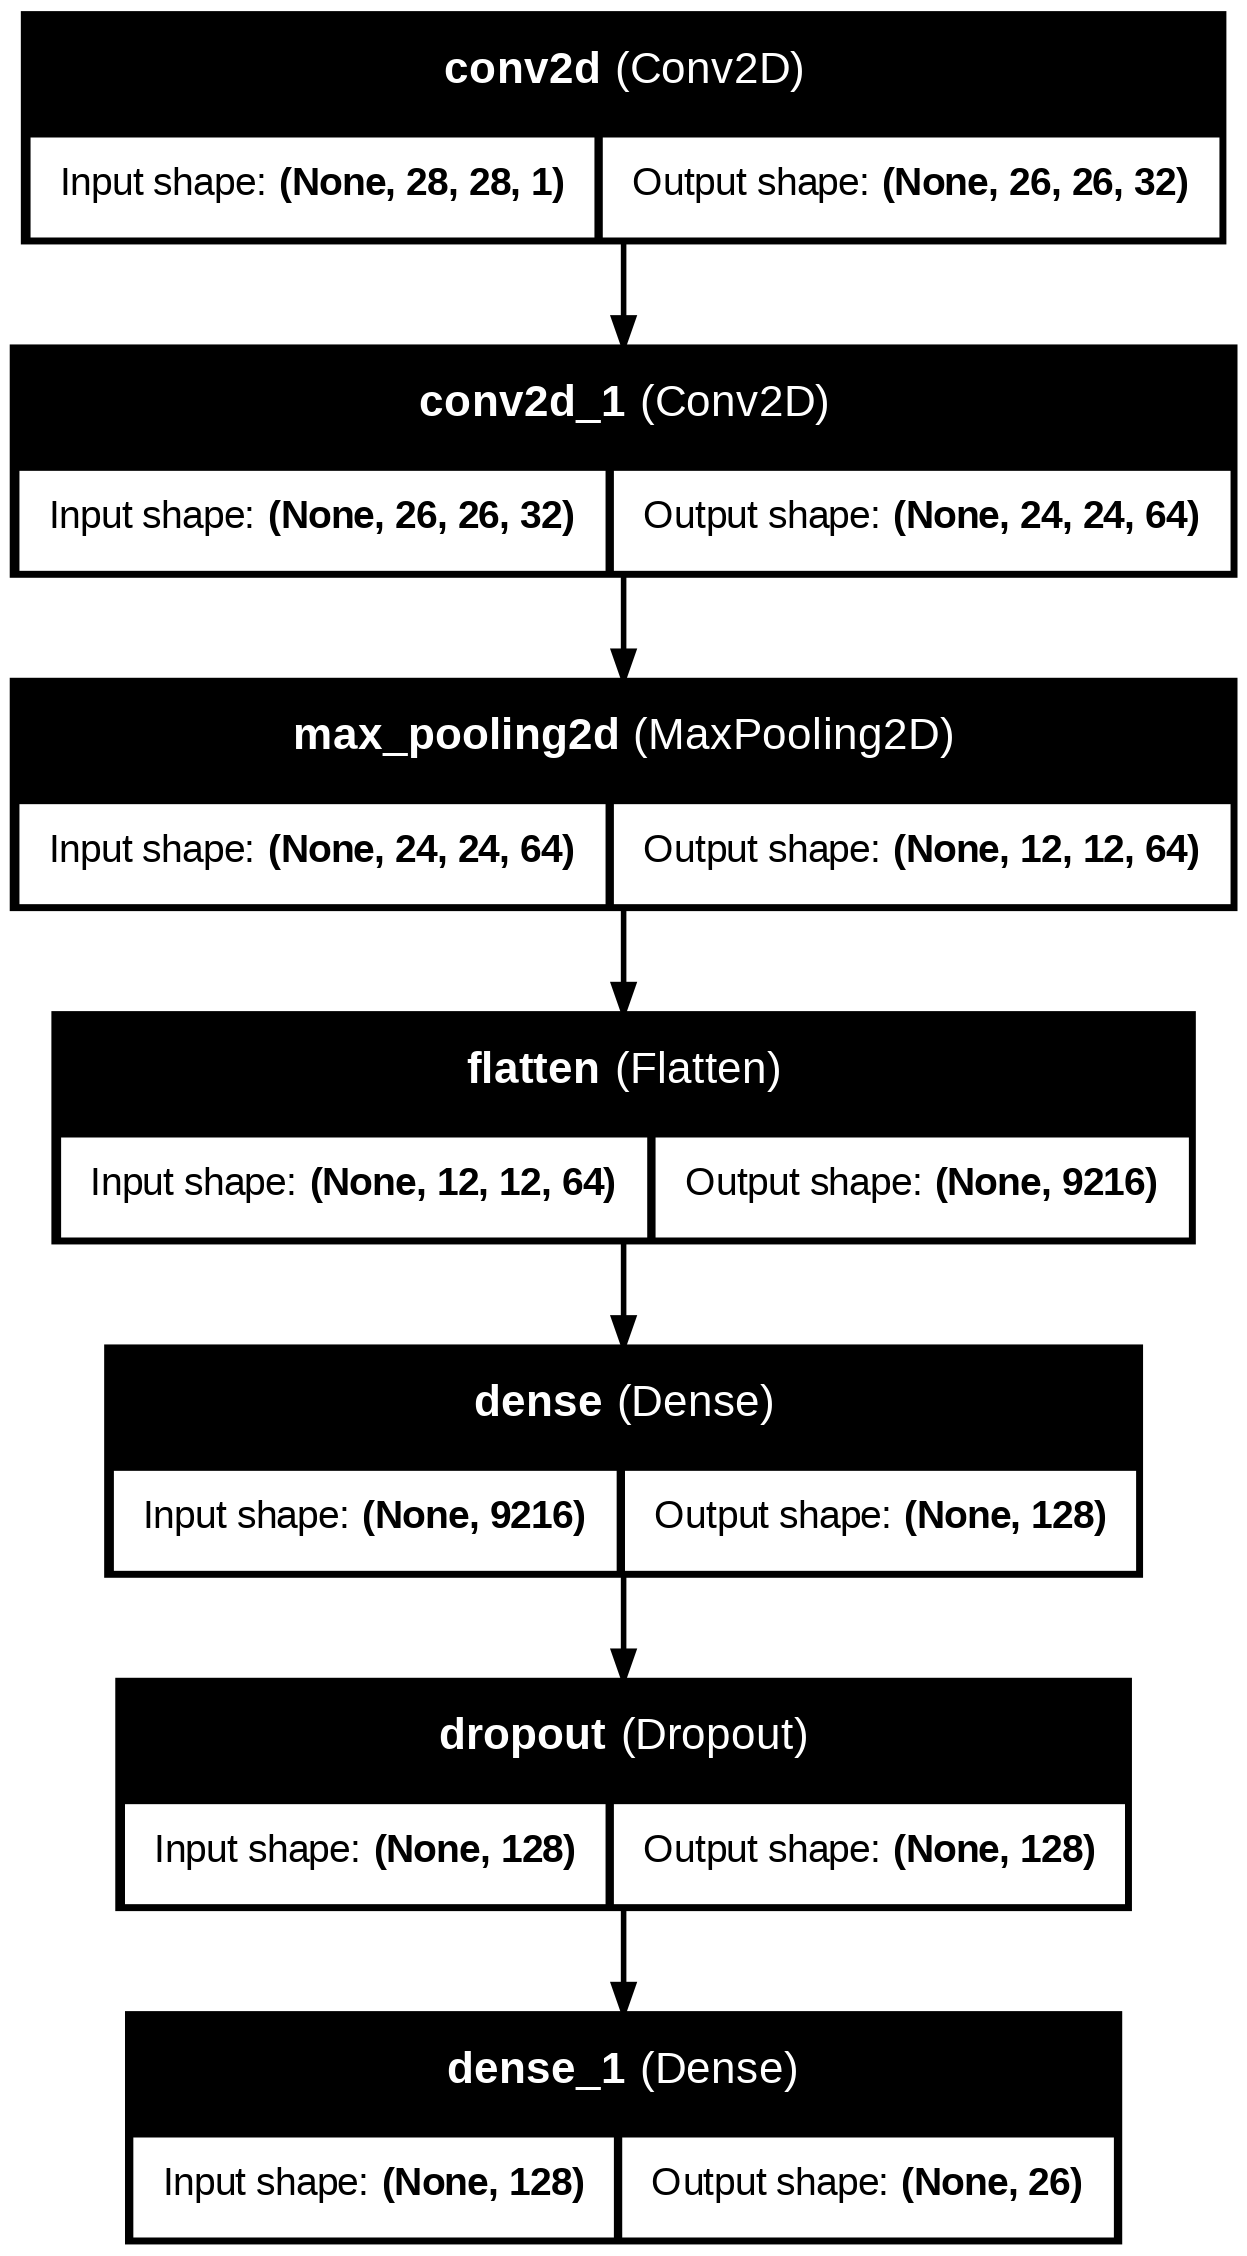

In [5]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='cnn_architecture.png')

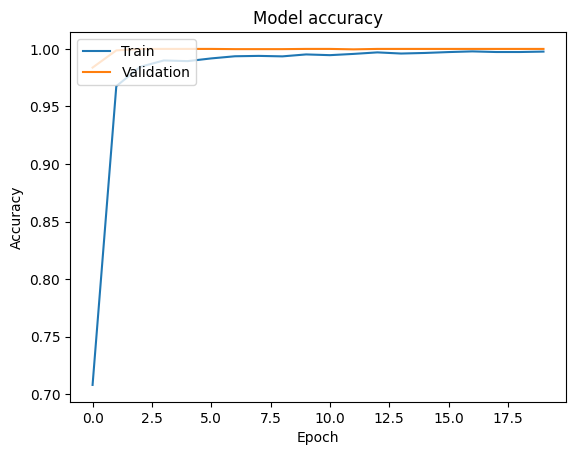

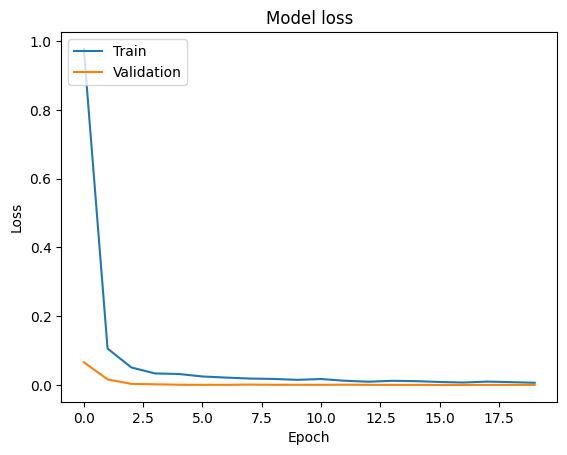

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Problem 2: Time Series Forecasting (Energy Consumption Forecasting) using LSTMs

In [7]:
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/household_power_consumption.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv(file_path, sep=';', na_values=['nan', '?'])

df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.set_index('datetime')
df = df.drop(['Date', 'Time'], axis=1)

df = df.interpolate(method='linear')
df['daily_consumption'] = df['Global_active_power'].resample('D').sum()
df = df.dropna()

<ipython-input-8-8170f4ee0ad1>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [9]:
data = df['daily_consumption'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [10]:
lookback = 30

X, y = [], []
for i in range(len(data)-lookback-1):
  X.append(data[i:(i+lookback), 0])
  y.append(data[i + lookback, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(lookback, 1)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - loss: 0.0921 - val_loss: 0.0214
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0177 - val_loss: 0.0090
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - val_loss: 0.0092
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - val_loss: 0.0086
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - val_loss: 0.0084
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - val_loss: 0.0085
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - val_loss: 0.0085
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0102 - val_loss: 0.0085
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - val_loss: 0.0086
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - val_loss: 0.0084


In [13]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])  # Reshape y_test before inverse transform

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0083
Test Loss: 0.0083
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test = y_test.reshape(-1, 1)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 295.6119448835228
RMSE: 412.42268922547436


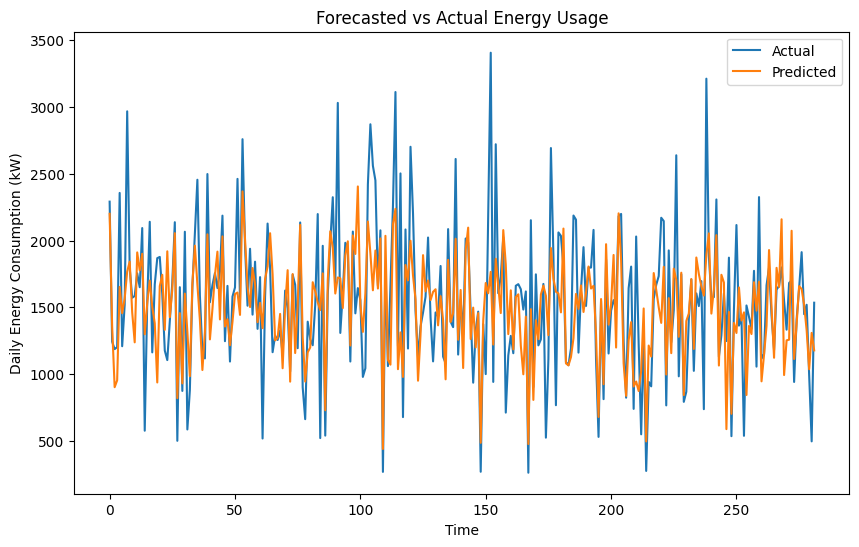

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Forecasted vs Actual Energy Usage')
plt.xlabel('Time')
plt.ylabel('Daily Energy Consumption (kW)')
plt.legend()
plt.show()